# 모델 프로토타입 제작

In [2]:
import tensorflow as tf

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from keras import Sequential
from keras.layers import Dense

import random
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./output/DL_data.csv')

In [5]:
df.columns

Index(['year', 'month', 'day', 'hour', 'datetime', 'temp', 'rainfall',
       'humidity', 'wind_speed', 'wind_direction', 'region', 'HI', 'DI',
       'height', '가로등', '교육용', '농사용', '산업용', '심야', '일반용', '임시전력', '주택용',
       'prev_winter'],
      dtype='object')

In [6]:
df = df[['year', 'month', 'day', 'hour', 'datetime', 'temp', 'rainfall',
       'humidity', 'wind_speed', 'wind_direction', 'region', 'HI', 'DI',
       'height']]
df

,year,month,day,hour,datetime,temp,rainfall,humidity,wind_speed,wind_direction,region,HI,DI,height
0,2010,6,1,0,2010-06-01 00:00:00,16.5,0.0,53.0,NaN,NaN,동인동,15.589444,60.74355,42.48
1,2010,6,1,1,2010-06-01 01:00:00,18.1,0.0,49.0,NaN,NaN,동인동,17.245000,62.73431,42.48
2,2010,6,1,2,2010-06-01 02:00:00,19.7,0.0,46.0,NaN,NaN,동인동,18.926667,64.65038,42.48
3,2010,6,1,3,2010-06-01 03:00:00,20.8,0.0,41.0,NaN,NaN,동인동,20.006111,65.72772,42.48
4,2010,6,1,4,2010-06-01 04:00:00,22.2,0.0,36.0,NaN,NaN,동인동,21.415556,67.04608,42.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,2022,4,30,19,2022-04-30 19:00:00,10.7,0.0,71.0,2.1,335.0,구지면,9.679444,52.33503,28.31
14831612,2022,4,30,20,2022-04-30 20:00:00,11.0,0.0,65.0,2.2,339.0,구지면,9.852778,52.99350,28.31
14831613,2022,4,30,21,2022-04-30 21:00:00,11.9,0.0,61.0,2.2,338.0,구지면,10.738333,54.40241,28.31
14831614,2022,4,30,22,2022-04-30 22:00:00,13.4,0.0,53.0,2.0,351.0,구지면,12.179444,56.60598,28.31


In [8]:
df.dropna(inplace=True)
df

,year,month,day,hour,datetime,temp,rainfall,humidity,wind_speed,wind_direction,region,HI,DI,height
4519,2010,12,6,7,2010-12-06 07:00:00,11.6,0.0,32.0,4.1,304.0,동인동,9.651111,54.79488,42.48
4520,2010,12,6,8,2010-12-06 08:00:00,10.6,0.0,35.0,3.6,300.0,동인동,8.629444,53.55390,42.48
4521,2010,12,6,9,2010-12-06 09:00:00,9.2,0.0,27.0,3.8,295.0,동인동,6.880556,52.35016,42.48
4522,2010,12,6,10,2010-12-06 10:00:00,7.9,0.0,34.0,4.1,281.0,동인동,5.633333,50.49614,42.48
4523,2010,12,6,11,2010-12-06 11:00:00,5.7,0.0,44.0,3.6,298.0,동인동,3.474444,47.10792,42.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,2022,4,30,19,2022-04-30 19:00:00,10.7,0.0,71.0,2.1,335.0,구지면,9.679444,52.33503,28.31
14831612,2022,4,30,20,2022-04-30 20:00:00,11.0,0.0,65.0,2.2,339.0,구지면,9.852778,52.99350,28.31
14831613,2022,4,30,21,2022-04-30 21:00:00,11.9,0.0,61.0,2.2,338.0,구지면,10.738333,54.40241,28.31
14831614,2022,4,30,22,2022-04-30 22:00:00,13.4,0.0,53.0,2.0,351.0,구지면,12.179444,56.60598,28.31


In [9]:
df = df[(df['month'] >= 5) & (df['month'] <= 9)]
df

,year,month,day,hour,datetime,temp,rainfall,humidity,wind_speed,wind_direction,region,HI,DI,height
8016,2011,5,1,0,2011-05-01 00:00:00,19.8,0.0,33.0,5.4,277.0,동인동,18.697222,64.08766,42.48
8017,2011,5,1,1,2011-05-01 01:00:00,20.5,0.0,23.0,6.1,282.0,동인동,19.206111,64.28385,42.48
8018,2011,5,1,2,2011-05-01 02:00:00,20.7,0.0,21.0,6.1,280.0,동인동,19.373889,64.36753,42.48
8019,2011,5,1,3,2011-05-01 03:00:00,21.3,0.0,21.0,5.9,275.0,동인동,20.033889,64.97827,42.48
8020,2011,5,1,4,2011-05-01 04:00:00,21.3,0.0,24.0,5.9,294.0,동인동,20.112222,65.18188,42.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14826523,2021,9,30,19,2021-09-30 19:00:00,16.8,0.0,100.0,0.5,338.0,구지면,17.146667,62.24000,28.31
14826524,2021,9,30,20,2021-09-30 20:00:00,17.1,0.0,100.0,1.0,328.0,구지면,17.476667,62.78000,28.31
14826525,2021,9,30,21,2021-09-30 21:00:00,16.9,0.0,100.0,2.0,346.0,구지면,17.256667,62.42000,28.31
14826526,2021,9,30,22,2021-09-30 22:00:00,17.5,0.0,100.0,2.2,325.0,구지면,17.916667,63.50000,28.31


* 풍속 Nan 전처리
* 결측치는 가능한한 없게끔

# 선형회귀분석

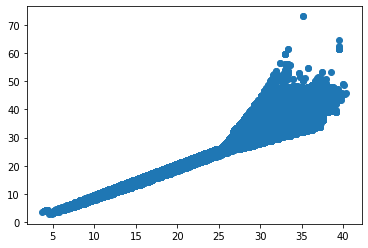

In [10]:
X = df["temp"]
y = df["HI"]
plt.plot(X, y, 'o')
plt.show()

In [11]:
line_fitter = LinearRegression()
line_fitter.fit(X.values.reshape(-1,1), y)

LinearRegression()

In [12]:
line_fitter.predict([[33]])

array([35.500783])

In [13]:
line_fitter.coef_

array([1.19306968])

In [14]:
line_fitter.intercept_

-3.8705162897601255

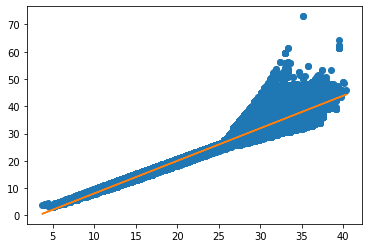

In [15]:
plt.plot(X, y, 'o')
plt.plot(X,line_fitter.predict(X.values.reshape(-1,1)))
plt.show()

  # 다중 선형회귀분석

In [28]:
from sklearn.model_selection import train_test_split

x = df[['year', 'month', 'day', 'hour', 'temp', 'rainfall','humidity', 'DI', 'height','wind_speed', 'wind_direction']]

y = df[['HI']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [29]:
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()

In [30]:
target_HI = [[2022, 6, 16, 14, 26, 15.5, 17, 60, 45 , 3, 278]]
my_predict = mlr.predict(target_HI)

c:\git_project\Team_Project\.venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [31]:
y_predict = mlr.predict(x_test)

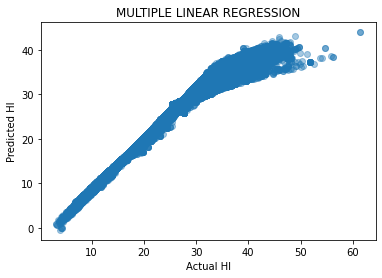

In [32]:
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual HI")
plt.ylabel("Predicted HI")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

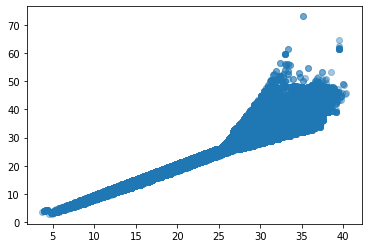

In [33]:
# 기온과 열지수 관계
plt.scatter(df[['temp']], df[['HI']], alpha=0.4)
plt.show()

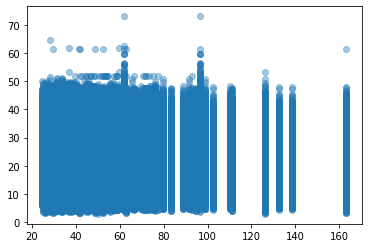

In [34]:
# 고도와 열지수 관계
plt.scatter(df[['height']], df[['HI']], alpha=0.4)
plt.show()

In [35]:
print(mlr.score(x_train, y_train))

0.9772848439760116


In [40]:
feature = df[['year', 'month', 'day', 'hour', 'temp', 'rainfall','humidity', 'DI', 'height','wind_speed', 'wind_direction']]

target = df[['HI']]

## 모델 만들기

In [41]:
X = tf.keras.layers.Input(shape=[11]) #피쳐의 개수 넣어줌
H = tf.keras.layers.Dense(10, activation='swish')(X)
y = tf.keras.layers.Dense(1)(H)

model = tf.keras.models.Model(X,y)
model.compile(loss='mse')

In [42]:
H = tf.keras.layers.Dense(4, activation='swish')(X)
H1 = tf.keras.layers.Dense(4, activation='swish')(H)
y = tf.keras.layers.Dense(1)(H1)

### 파라미터에 verbose=0 쓰면 진행창 안보임. 
* <span style = "color:#008000"> 학습 속도 상승 </span>
* <span style = "color:red"> 언제 끝나는지 확인 불가 </span>

In [ ]:
model.fit(feature,target,epochs=10) 

In [ ]:
model.predict(feature[:5])

1/1 [==============================] - 0s 119ms/step


array([[15.348032],
       [17.397131],
       [19.262058],
       [20.372908],
       [21.749054]], dtype=float32)

In [ ]:
target[:5]

,HI
0,15.589444
1,17.245000
2,18.926667
3,20.006111
4,21.415556


### 모델 평가

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import f1_score,roc_auc_score


In [ ]:
print("Accuracy : %.4f" % accuracy_score())